<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Project9/Assignment_9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 9A



In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print (num_classes)

170500096/170498071 [==============================] - 4s 0us/step
10


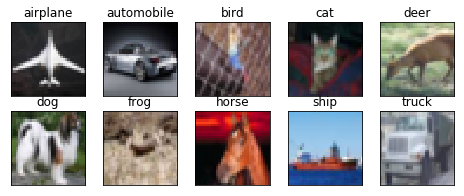

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [13]:
# Define the model
model = Sequential()
#When 3x3 convolutions are used, Receptive field = (2**(i+1) − 1)×(2**(i+1) − 1) where i is the dilation rate.

model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3))) #30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, activation='relu')) #28
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, activation='relu')) #26
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #11
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu')) #9
model.add(BatchNormalization())
model.add(Dropout(0.2))

#model.add(SeparableConv2D(64, 3, 3, activation='relu', border_mode='same' )) #9
#model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #5
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu')) #3
model.add(BatchNormalization())
model.add(Dropout(0.2))


#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))


#model.add(Convolution2D(128, 1,1, activation='relu', border_mode='same'))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

from keras.callbacks import LearningRateScheduler
import math
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
import os
import math
from keras.callbacks import ModelCheckpoint

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p modelstore
!google-drive-ocamlfuse modelstore
!ls /content/modelstore
!cd modelstore

filepath="modelstore/weights-assign9-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint_dir = os.path.dirname(filepath)
!ls {checkpoint_dir}
print( os.getcwd() )
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update yo

E: Package 'python-software-properties' has no installation candidate
W: Failed to fetch https://cloud.r-project.org/bin/linux/ubuntu/bionic-cran35/InRelease  Temporary failure resolving 'cloud.r-project.org'
W: Some index files failed to download. They have been ignored, or old ones used instead.
W: Failed to fetch https://cloud.r-project.org/bin/linux/ubuntu/bionic-cran35/InRelease  Temporary failure resolving 'cloud.r-project.org'
W: Some index files failed to download. They have been ignored, or old ones used instead.
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
'Colab Notebooks'   installKeras.ipynb
 EIPImandi	    modelstore
 EIPSessions	    mountdrive.ipynb
 EVA		   'Sleep latency vs respiratory rate 2019-02-19 14.38.01.png'
 EVA_S1.ipynb	    Untitled0.ipynb
'Getting started'
'Colab Notebooks'   installKeras.ipynb
 EIPImandi	    modelstore
 EIPSessions	    mountdrive.ipynb
 EVA		   'Sleep latency vs respiratory rate 

In [14]:
model.summary()
print(train_features.shape[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_19 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 28, 28, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., epochs=100)`
  if sys.path[0] == '':


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 23s 59ms/step - loss: 1.6820 - acc: 0.4029 - val_loss: 1.4460 - val_acc: 0.4759

Epoch 00001: val_acc improved from -inf to 0.47590, saving model to modelstore/weights-assign9-01-0.4759.hdf5
Epoch 2/100
390/390 [==============================] - 21s 54ms/step - loss: 1.2295 - acc: 0.5607 - val_loss: 1.1920 - val_acc: 0.5758

Epoch 00002: val_acc improved from 0.47590 to 0.57580, saving model to modelstore/weights-assign9-02-0.5758.hdf5
Epoch 3/100
390/390 [==============================] - 21s 53ms/step - loss: 1.0394 - acc: 0.6350 - val_loss: 1.2408 - val_acc: 0.5775

Epoch 00003: val_acc improved from 0.57580 to 0.57750, saving model to modelstore/weights-assign9-03-0.5775.hdf5
Epoch 4/100
390/390 [==============================] - 21s 53ms/step - loss: 0.9140 - acc: 0.6767 - val_loss: 0.9791 - val_acc: 0.6657

Epoch 00004: val_acc improved from 0.57750 to 0.66570, saving model to modelstore/weights-assign9-04-0.6657.hdf5
Epoch 5/100
390/390

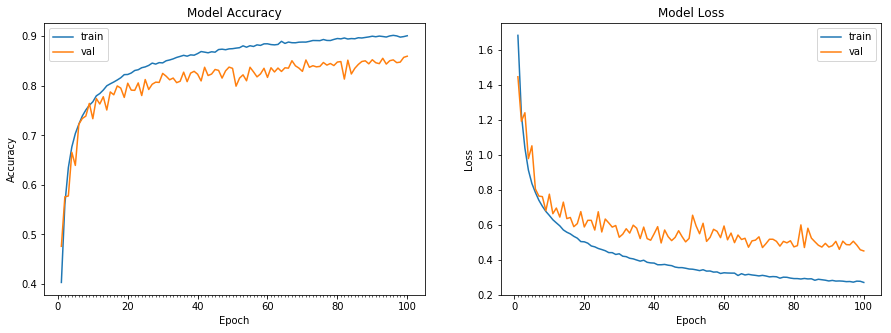

Accuracy on test data is: 85.97


In [15]:


datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, featurewise_center=True, featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], steps_per_epoch=128, nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))